<div style="text-align: right"> <font color='Gray'> Sociofísica - 2023 </div>
<div style="text-align: right"> <font color='Gray'> Tarea N° 3 </div>
<div style="text-align: right"> <font color='Gray'> Sebastián Pulgares </div>


***

Modelo de Deffuant
---
Se presenta un modelo continuo de opinión, donde los agentes ajustan su opinión en base a encuentros binarios con otros agentes.

Considerando una población de $N$ agentes $i$ con una opinión continua $x_i$, en cada paso temporal dos agentes se encuentran y reajustan su opinión cuando la diferencia entre sus opiniones es menor que un umbral $\epsilon$ de la siguiente forma:
$$
\begin{array}{lr} x & = x +\mu(x'-x)\\ x' & = x' +\mu(x-x') \end{array}
$$

Donde $\mu$ es el parámetro de convergencia

Simulación
---
Para las simulaciones pedidas, las opiniones de los agentes son generadas a partir de una distribución uniforme entre 0 y 1, los valores de los parámetros están en las instrucciones, es necesario destacar que para la reproducción de las figuras, los pasos temporales no fueron subdivididos en $dt$ encuentros debido a que la convergencia se daba muy rápido.

Los parámetros necesarios para la reproducción de las figuras son:
* Fig 1: $N=2000, steps = 50000, dt=1, \epsilon=0.5, \mu = 0.5$ 
* Fig 2: $N=1000, steps = 50000, dt=1, \epsilon=0.2, \mu = 0.5$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from tqdm import trange
plt.style.use('ggplot')

In [2]:
def model(N, steps ,dt, E, U, nombre):
    '''
    INPUT
    N : numero de agentes
    steps : numero de pasos temporales
    dt : numero de interacciones que corresponden a un paso temporal
    E:  umbral de opinion
    U: parametro de convergencia
    nombre: Nombre de carpeta donde guardar los archivos
    '''
    start=time.time()
    path = './Simulacion/'+ str(nombre)+'/'
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
    with open(path+'/log.txt', 'w') as file: ##Archivo que guardará los parámetros usados
        file.write( 'El numero de agentes es: '+str(N)+'\n')
        file.write('El paso temporal se definió como '+str(dt)+' emparejamientos'+'\n')
        file.write('Se consideraron '+str(steps)+' pasos temporales'+'\n')
        file.write('El umbral utilizado fue: '+str(E)+'\n')
        file.write('El parámetro de convergencia utilizado fue: '+str(U)+'\n')
    Agents = list(np.random.uniform(0, 1, size=N)) # Condicion inicial
    timesteps = [0]*(steps) # Lista para parear los pasos temporales
    timesteps[0] = Agents.copy() # Tiempo de la condicion inicial
    aux = 0 # Variable auxiliar para contar las interacciones
    for t in trange(1,steps):
        i, j = np.random.randint(N), np.random.randint(N) # Elige dos agentes aleatoriamente
        if (np.abs(Agents[i]-Agents[j]) < E): # Compara sus opiniones
            Agents[i] = Agents[i] + U*(Agents[j] - Agents[i])
            Agents[j] = Agents[j] + U*(Agents[i] - Agents[j])
            aux += 1
        if aux >= dt:
            aux = 0
            timesteps[t] = Agents.copy()
        else:
            timesteps[t] = Agents.copy()
    end=time.time()
    with open(path+'/log.txt', 'a') as file:
        file.write("El calculo de esta simulación se demoró : "+str(end-start)+ " segundos")
    print("El tiempo de calculo es "+str(end-start)+ " segundos")
    return timesteps

In [5]:
def plotter(N, steps ,dt, E, U, nombre):
    path = './Simulacion/'+ str(nombre)+'/'
    res=model(N, steps ,dt, E, U, nombre)
    ts=[[i]*N for i in range(steps)]
    plt.scatter(ts,res, s = 1.6)
    plt.xlabel('tiempo')
    plt.ylabel('Opinión')
    plt.savefig(path+'Umbral='+str(E)+'.png')
    plt.show

  0%|          | 0/49999 [00:00<?, ?it/s]

100%|██████████| 49999/49999 [00:03<00:00, 16374.99it/s]


El tiempo de calculo es 3.0756375789642334 segundos


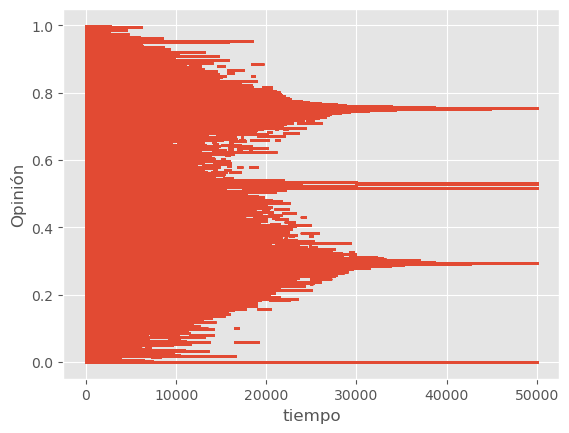

In [6]:
plotter(1000,50000,1000,0.2,0.5, 'asd2')